<a href="https://colab.research.google.com/github/nv-hiep/pyspark/blob/main/pyspark_course_GL_LogisticRegression_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
if not os.path.exists('/content/spark-3.1.1-bin-hadoop3.2.tgz'):
  !wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
  
  # unzip the spark file to the current folder
  !tar xf spark-3.1.1-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# For python users, you should also install pyspark using the following command.
# !pip install pyspark

Run a local spark session to test your installation:

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.sql import SparkSession, Window, Row

from pyspark.sql.functions import *
from pyspark.sql.types import *
import matplotlib.pyplot as plt

#https://spark.apache.org/docs/latest/sql-getting-started.html
# spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.appName('PySpark').getOrCreate()
# spark = SparkSession.builder.appName('PySpark').enableHiveSupport().getOrCreate()

spark.conf.set('spark.sql.repl.eagerEval.enabled', True) # Property used to format output tables better


# spark = SparkSession.builder.appName('PySpark').master("local[1]").config("spark.sql.catalogImplementation","hive").enableHiveSupport().getOrCreate()
# spark.conf.set("spark.sql.catalogImplementation","hive")
# spark.conf.set('spark.sql.sources.default', 'delta')
# spark.conf.set('spark.sql.legacy.createHiveTableByDefault', False)
# spark.conf.set('spspark.sql.hive.convertCTAS', True)

spark

In [ ]:
# from pyspark.sql.functions import udf
# from pyspark.sql.types import IntegerType
import urllib.request

In [ ]:
# ! rm -rf spark-3.1.1-bin-hadoop3.2.tgz

In [ ]:
!ls

sample_data  spark-3.1.1-bin-hadoop3.2	spark-3.1.1-bin-hadoop3.2.tgz


In [ ]:
from pyspark.ml.classification import LogisticRegression

# Connect to Kaggle

Ref: https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2

Install the Kaggle package that will be used for importing the data.

In [ ]:
# !pip install kaggle

Next, we need to upload the credentials of our Kaggle account. To do so, you need to enter your profile and “Create New API Token”. If you already have one you can click on “Expire API Token” and create a new one.

Then, save the json file with your credentials on your computer and upload this file to Colab using the code below:

In [ ]:
# from google.colab import files
# files.upload()

The Kaggle API client expects the json file to be in ~/.kaggle folder so let’s create a new folder and move it inside.

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

Next, we will click on the three vertical points on the right side of the screen and “Copy the API Command” of the dataset that we want to import from Kaggle.

In [ ]:
# !kaggle datasets download -d jessicali9530/celeba-dataset
# !kaggle datasets download -d hesh97/titanicdataset-traincsv

In [ ]:
# !pwd

Let’s see the imported files:

In [ ]:
# !ls

Now, the last step is to open the extracted files and get the data:

In [ ]:
# import zipfile
# zip_ref = zipfile.ZipFile('titanicdataset-traincsv.zip', 'r')
# zip_ref.extractall('files')
# zip_ref.close()

In [ ]:
# !ls

In [ ]:
# ! rm -rf titanicdataset-traincsv.zip

In [ ]:
# !ls

In [ ]:
# % cd files

In [ ]:
# !ls

That’s it! Now your data is ready and you can start working on it.

# Load LIBSVM data

In [ ]:
DATA_PATH = '/content/sample_data/'
DATA_DIR  = os.path.join(DATA_PATH, 'data')

In [ ]:
if not os.path.exists(DATA_DIR):
  os.mkdir(DATA_DIR)

In [ ]:
url = 'https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_libsvm_data.txt'
textfile = os.path.join( DATA_DIR, os.path.split(url)[-1])

if not os.path.exists(textfile):
  filename, headers = urllib.request.urlretrieve(url, textfile)

In [ ]:
training_data = spark.read.format('libsvm').load(textfile)

In [ ]:
training_data.show(truncate=False)

+-----+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# LogisticRegression
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

In [ ]:
lr_model = lr.fit(training_data)

In [ ]:
lr_model

LogisticRegressionModel: uid=LogisticRegression_470d784c5271, numClasses=2, numFeatures=692

In [ ]:
# Print the coefficients and intercept for logistic regression
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: (692,[244,263,272,300,301,328,350,351,378,379,405,406,407,428,433,434,455,456,461,462,483,484,489,490,496,511,512,517,539,540,568],[-7.353983524188241e-05,-9.102738505589566e-05,-0.0001946743054690423,-0.00020300642473486603,-3.147618331486458e-05,-6.842977602660821e-05,1.5883626898236275e-05,1.4023497091368928e-05,0.0003543204752496838,0.00011443272898171099,0.00010016712383666487,0.0006014109303795511,0.0002840248179122765,-0.00011541084736508905,0.000385996886312906,0.0006350195574241097,-0.00011506412384575733,-0.0001527186586498689,0.0002804933808994214,0.0006070117471191665,-0.0002008459663247435,-0.00014210755792901347,0.0002739010341160883,0.0002773045624496811,-9.838027027269408e-05,-0.00038085224435175833,-0.00025315198008554285,0.0002774771477075434,-0.00024436197639191286,-0.0015394744687597679,-0.00023073328411330604])
Intercept: 0.22456315961250245


In [ ]:
# We can also use the multinomial family for binary classification
mlr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8, family="multinomial")

# Fit the model
mlr_model = mlr.fit(training_data)

In [ ]:
# Print the coefficients and intercepts for logistic regression with multinomial family
print("Multinomial coefficients: " + str(mlr_model.coefficientMatrix))
print("Multinomial intercepts: " + str(mlr_model.interceptVector))

Multinomial coefficients: 2 X 692 CSRMatrix
(0,244) 0.0
(0,263) 0.0001
(0,272) 0.0001
(0,300) 0.0001
(0,350) -0.0
(0,351) -0.0
(0,378) -0.0
(0,379) -0.0
(0,405) -0.0
(0,406) -0.0006
(0,407) -0.0001
(0,428) 0.0001
(0,433) -0.0
(0,434) -0.0007
(0,455) 0.0001
(0,456) 0.0001
..
..
Multinomial intercepts: [-0.12065879445860596,0.12065879445860596]


In [ ]:
# Extract the summary from the returned LogisticRegressionModel instance trained
# in the earlier example
trainingSummary = lr_model.summary

In [ ]:
# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory

print("objectiveHistory:")
for objective in objectiveHistory:
  print(objective)

objectiveHistory:
0.6833149135741672
0.6662875751473734
0.6217068546034616
0.6127265245887888
0.6060347986802872
0.6031750687571563
0.5969621534836272
0.594074303198312
0.5906089243339021
0.5894724576491043
0.5882187775729588


In [ ]:
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

+---+--------------------+
|FPR|                 TPR|
+---+--------------------+
|0.0|                 0.0|
|0.0|0.017543859649122806|
|0.0| 0.03508771929824561|
|0.0| 0.05263157894736842|
|0.0| 0.07017543859649122|
|0.0| 0.08771929824561403|
|0.0| 0.10526315789473684|
|0.0| 0.12280701754385964|
|0.0| 0.14035087719298245|
|0.0| 0.15789473684210525|
|0.0| 0.17543859649122806|
|0.0| 0.19298245614035087|
|0.0| 0.21052631578947367|
|0.0| 0.22807017543859648|
|0.0| 0.24561403508771928|
|0.0|  0.2631578947368421|
|0.0|  0.2807017543859649|
|0.0|  0.2982456140350877|
|0.0|  0.3157894736842105|
|0.0|  0.3333333333333333|
+---+--------------------+
only showing top 20 rows

areaUnderROC: 1.0


In [ ]:
fpr = trainingSummary.roc.select('FPR').toPandas().to_numpy()
tpr = trainingSummary.roc.select('TPR').toPandas().to_numpy()

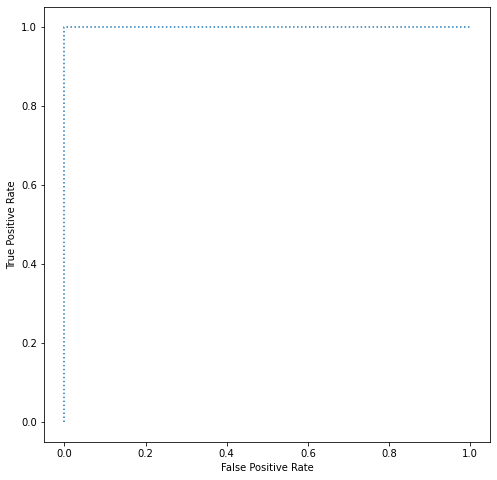

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, ':')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
# Set the model threshold to maximize F-Measure
fMeasure = trainingSummary.fMeasureByThreshold
maxFMeasure = fMeasure.groupBy().max('F-Measure').select('max(F-Measure)').head()
bestThreshold = fMeasure.where(fMeasure['F-Measure'] == maxFMeasure['max(F-Measure)']) \
    .select('threshold').head()['threshold']
lr.setThreshold(bestThreshold)

LogisticRegression_8ec046f73597

# Multiclass logistic regression

The following example shows how to train a multiclass logistic regression model with elastic net regularization, as well as extract the multiclass training summary for evaluating the model.

In [ ]:
url = 'https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_multiclass_classification_data.txt'
textfile = os.path.join( DATA_DIR, os.path.split(url)[-1])

if not os.path.exists(textfile):
  filename, headers = urllib.request.urlretrieve(url, textfile)

In [ ]:
training_data = spark.read.format('libsvm').load(textfile)

In [ ]:
training_data.show(truncate=False)

+-----+-----------------------------------------------------------+
|label|features                                                   |
+-----+-----------------------------------------------------------+
|1.0  |(4,[0,1,2,3],[-0.222222,0.5,-0.762712,-0.833333])          |
|1.0  |(4,[0,1,2,3],[-0.555556,0.25,-0.864407,-0.916667])         |
|1.0  |(4,[0,1,2,3],[-0.722222,-0.166667,-0.864407,-0.833333])    |
|1.0  |(4,[0,1,2,3],[-0.722222,0.166667,-0.694915,-0.916667])     |
|0.0  |(4,[0,1,2,3],[0.166667,-0.416667,0.457627,0.5])            |
|1.0  |(4,[0,2,3],[-0.833333,-0.864407,-0.916667])                |
|2.0  |(4,[0,1,2,3],[-1.32455E-7,-0.166667,0.220339,0.0833333])   |
|2.0  |(4,[0,1,2,3],[-1.32455E-7,-0.333333,0.0169491,-4.03573E-8])|
|1.0  |(4,[0,1,2,3],[-0.5,0.75,-0.830508,-1.0])                   |
|0.0  |(4,[0,2,3],[0.611111,0.694915,0.416667])                   |
|0.0  |(4,[0,1,2,3],[0.222222,-0.166667,0.423729,0.583333])       |
|1.0  |(4,[0,1,2,3],[-0.722222,-0.166667,-0.8644

In [ ]:
lr = LogisticRegression(maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Fit the model
lrModel = lr.fit(training_data)

# Print the coefficients and intercept for multinomial logistic regression
print("Coefficients: \n" + str(lrModel.coefficientMatrix))
print("Intercept: " + str(lrModel.interceptVector))

Coefficients: 
3 X 4 CSRMatrix
(0,3) 0.3176
(1,2) -0.7804
(1,3) -0.377
Intercept: [0.051652316598328564,-0.12391224990853633,0.07225993331020777]


In [ ]:
trainingSummary = lrModel.summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

objectiveHistory:
1.098612288668108
1.087602085441699
1.0341156572156232
1.0289859520256006
1.0300389657358993
1.0239965158223994
1.0236097451839508
1.0231082121970008
1.023022220302788
1.0230018151780262
1.0229963739557606


In [ ]:
# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

False positive rate by label:
label 0: 0.22
label 1: 0.05
label 2: 0.0
True positive rate by label:
label 0: 1.0
label 1: 1.0
label 2: 0.46
Precision by label:
label 0: 0.6944444444444444
label 1: 0.9090909090909091
label 2: 1.0
Recall by label:
label 0: 1.0
label 1: 1.0
label 2: 0.46
F-measure by label:
label 0: 0.819672131147541
label 1: 0.9523809523809523
label 2: 0.6301369863013699


In [ ]:
accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Accuracy: 0.82
FPR: 0.09
TPR: 0.82
F-measure: 0.800730023276621
Precision: 0.8678451178451179
Recall: 0.82


# Load KMEANS data

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [ ]:
url = 'https://raw.githubusercontent.com/apache/spark/master/data/mllib/sample_kmeans_data.txt'
textfile = os.path.join( DATA_DIR, os.path.split(url)[-1])

if not os.path.exists(textfile):
  filename, headers = urllib.request.urlretrieve(url, textfile)

In [ ]:
textfile

'/content/sample_data/data/sample_kmeans_data.txt'

In [ ]:
with open(textfile) as f:
  content = f.readlines()

# you may also want to remove whitespace characters like `\n` at the end of each line
# content = [x.strip().replace('\x01', ', ') for x in content]
# content = '\n'.join(content)
content

['0 1:0.0 2:0.0 3:0.0\n',
 '1 1:0.1 2:0.1 3:0.1\n',
 '2 1:0.2 2:0.2 3:0.2\n',
 '3 1:9.0 2:9.0 3:9.0\n',
 '4 1:9.1 2:9.1 3:9.1\n',
 '5 1:9.2 2:9.2 3:9.2\n']

In [ ]:
# f = open(textfile, 'w')
# f.write(content)
# f.close()

In [ ]:
# with open(textfile) as f:
#   content = f.readlines()

# content

In [ ]:
# Load data
dataset = spark.read.format('libsvm').load( textfile )

In [ ]:
dataset.show(truncate=False)

+-----+-------------------------+
|label|features                 |
+-----+-------------------------+
|0.0  |(3,[],[])                |
|1.0  |(3,[0,1,2],[0.1,0.1,0.1])|
|2.0  |(3,[0,1,2],[0.2,0.2,0.2])|
|3.0  |(3,[0,1,2],[9.0,9.0,9.0])|
|4.0  |(3,[0,1,2],[9.1,9.1,9.1])|
|5.0  |(3,[0,1,2],[9.2,9.2,9.2])|
+-----+-------------------------+



In [ ]:
kmeans = KMeans().setK(2).setSeed(1)
model = kmeans.fit(dataset)

In [ ]:
predictions = model.transform(dataset)

In [ ]:
predictions.show()

+-----+--------------------+----------+
|label|            features|prediction|
+-----+--------------------+----------+
|  0.0|           (3,[],[])|         1|
|  1.0|(3,[0,1,2],[0.1,0...|         1|
|  2.0|(3,[0,1,2],[0.2,0...|         1|
|  3.0|(3,[0,1,2],[9.0,9...|         0|
|  4.0|(3,[0,1,2],[9.1,9...|         0|
|  5.0|(3,[0,1,2],[9.2,9...|         0|
+-----+--------------------+----------+



In [ ]:
evaluator = ClusteringEvaluator()

In [ ]:
silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

Silhouette with squared euclidean distance = 0.9997530305375207


In [ ]:
print('Number of data points:', dataset.count())

Number of data points: 6


In [ ]:
# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
  print(center)

Cluster Centers: 
[9.1 9.1 9.1]
[0.1 0.1 0.1]


# TF-IDF

In [ ]:
from pyspark.ml.feature import HashingTF, IDF, Tokenizer

In [ ]:
sentence_data = spark.createDataFrame( [
                                        (0., 'Hi I heard about Spark'),
                                        (0., 'I wish Java could use case classes'),
                                        (1., 'Logistic regression models are neat')
                                        ], ['label', 'sentence'])

In [ ]:
sentence_data.show(truncate=False)

+-----+-----------------------------------+
|label|sentence                           |
+-----+-----------------------------------+
|0.0  |Hi I heard about Spark             |
|0.0  |I wish Java could use case classes |
|1.0  |Logistic regression models are neat|
+-----+-----------------------------------+



In [ ]:
# To lists of words
tokenizer = Tokenizer( inputCol='sentence', outputCol='words' )

In [ ]:
words_data = tokenizer.transform(sentence_data)

In [ ]:
words_data.show(truncate=False)

+-----+-----------------------------------+------------------------------------------+
|label|sentence                           |words                                     |
+-----+-----------------------------------+------------------------------------------+
|0.0  |Hi I heard about Spark             |[hi, i, heard, about, spark]              |
|0.0  |I wish Java could use case classes |[i, wish, java, could, use, case, classes]|
|1.0  |Logistic regression models are neat|[logistic, regression, models, are, neat] |
+-----+-----------------------------------+------------------------------------------+



In [ ]:
hashing_tf = HashingTF( inputCol='words', outputCol='raw_features', numFeatures=20 )
hashing_tf

HashingTF_6e413f8883f7

In [ ]:
featurized_data = hashing_tf.transform(words_data)

In [ ]:
# raw_features: number_of_features, 
featurized_data.select(['label', 'words', 'raw_features']).show(truncate=False)

+-----+------------------------------------------+-----------------------------------------------+
|label|words                                     |raw_features                                   |
+-----+------------------------------------------+-----------------------------------------------+
|0.0  |[hi, i, heard, about, spark]              |(20,[6,8,13,16],[1.0,1.0,1.0,2.0])             |
|0.0  |[i, wish, java, could, use, case, classes]|(20,[0,2,7,13,15,16],[1.0,1.0,2.0,1.0,1.0,1.0])|
|1.0  |[logistic, regression, models, are, neat] |(20,[3,4,6,11,19],[1.0,1.0,1.0,1.0,1.0])       |
+-----+------------------------------------------+-----------------------------------------------+



In [ ]:
# Here we can also use CountVectorizer to get the term frequency vectors
# Comparison between HashingTF and CountVectorizer can be found here: https://towardsdatascience.com/countvectorizer-hashingtf-e66f169e2d4e

In [ ]:
idf = IDF(inputCol='raw_features', outputCol='features')
idf

IDF_04d47f10202d

In [ ]:
idf_model = idf.fit(featurized_data)
idf_model

IDFModel: uid=IDF_04d47f10202d, numDocs=3, numFeatures=20

In [ ]:
rescaled_data = idf_model.transform(featurized_data)
rescaled_data.select(['label', 'words', 'raw_features', 'features']).show(truncate=False)

+-----+------------------------------------------+-----------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+
|label|words                                     |raw_features                                   |features                                                                                                                                   |
+-----+------------------------------------------+-----------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------+
|0.0  |[hi, i, heard, about, spark]              |(20,[6,8,13,16],[1.0,1.0,1.0,2.0])             |(20,[6,8,13,16],[0.28768207245178085,0.6931471805599453,0.28768207245178085,0.5753641449035617])                                           |
|0.0  |[i, wish, java, could, use, case, cla